In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

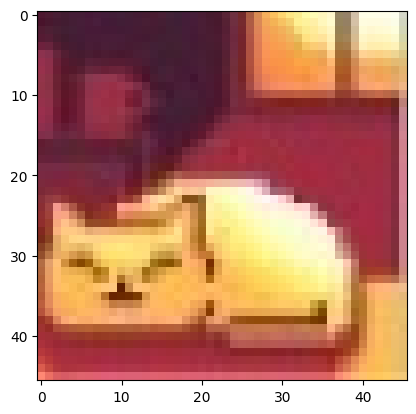

In [3]:
image = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height = image.shape[0]
width = image.shape[1]
plt.imshow(image)

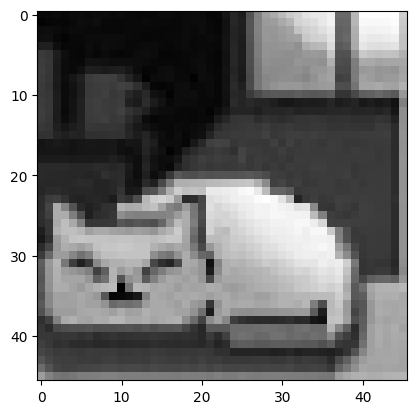

In [4]:
# Using (R + G + B)/ 3
def GrayDevidedBy3(image):
  # Empty arr for image
  graiImage = np.zeros((height, width), dtype=np.uint8)
  for i in range(width):
      for j in range(height):
          # Extract channel
          red = image[i, j, 0]
          green = image[i, j, 1]
          blue = image[i, j, 2]

          gray = (red/3 + green/3 + blue/3)
          graiImage[i, j] = gray
  return graiImage


grayImage1 = GrayDevidedBy3(image)
plt.imshow(grayImage1, 'gray')



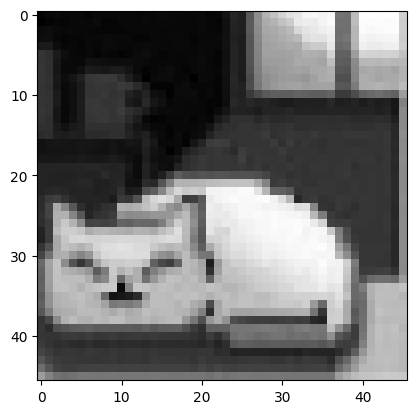

In [5]:
# Using R*0.3 + G*0.59 + B*0.11
def GrayMultyOnConst(image):
  # Empty arr for image
  graiImage = np.zeros((height, width), dtype=np.uint8)
  for i in range(width):
      for j in range(height):
          # Extract channel
          red = image[i, j, 0]
          green = image[i, j, 1]
          blue = image[i, j, 2]

          gray = (red*0.3 + green*0.59 + blue*0.11)
          graiImage[i, j] = gray
  return graiImage


grayImage2 = GrayMultyOnConst(image)
plt.imshow(grayImage1, 'gray')

plt.imshow(grayImage2, 'gray')

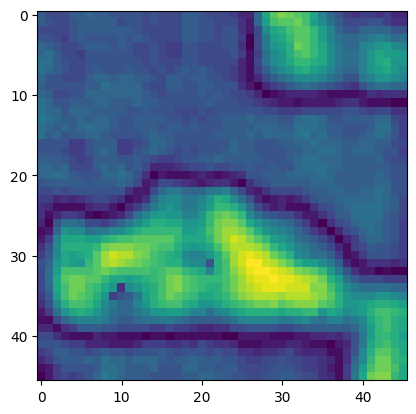

In [6]:
# Getting diff between gray image
def diff(image1, image2):
  image = np.abs(image1.astype(np.int16) - image2.astype(np.int16))
  image = (255 * ((image - image.min())/(image.max() - image.min()+1E-7))).astype(np.uint8)
  return image

plt.imshow(diff(grayImage1, grayImage2))

In [31]:
# Getting video 
input_video_path = 'cat_video.mp4'
cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_rate = int(cap.get(5))

# Output video props
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output_video_path = "cat_grayvideo.mp4" 
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height), isColor=False)

# Frames processing 
while cap.isOpened():
    isFrame, frame = cap.read()

    if not isFrame:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(gray_frame)

# Stop io process
cap.release()
out.release()
cv2.destroyAllWindows()

In [32]:
# Getting video 
input_video_path = 'cat_video.mp4'
cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_rate = int(cap.get(5))

# Output video props
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output_video_path = "cat_motion_capture.mp4" 
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height), isColor=False)


prev_frame = None

# Frames processing 
while cap.isOpened():
    
    isFrame, frame = cap.read()
    if not isFrame:
        break

    # Capture moves
    if prev_frame is not None:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        diff_frame = cv2.absdiff(gray_frame, prev_frame)
        out.write(diff_frame)

    # Save previous frame 
    prev_frame = gray_frame

# Освободить ресурсы
cap.release()
out.release()
cv2.destroyAllWindows()